<a href="https://colab.research.google.com/github/Kunalthebug/Deep-Learning/blob/master/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn,length=len(uploaded[fn])))

Saving data.csv to data.csv
User uploaded file "data.csv" with length 125204 bytes


In [0]:
import pandas as pd
import io
data=pd.read_csv(io.StringIO(uploaded['data.csv'].decode('utf-8')))
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Benign 357
Malignant 212


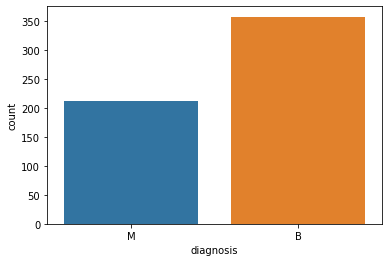

In [0]:
import seaborn as sns
ax=sns.countplot(data['diagnosis'],label='Count')
B,M=data['diagnosis'].value_counts()
print('Benign',B)
print('Malignant',M)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
del data['Unnamed: 32']

In [0]:
X=data.iloc[:,2:].values
y=data.iloc[:,1].values


In [0]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1=LabelEncoder()
y=labelencoder_X_1.fit_transform(y)


In [0]:
#splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,shuffle=True)


In [0]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [0]:
!pip install keras

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [0]:
#adding input layer
classifier=Sequential()
classifier.add(Dense(input_dim=30,output_dim=16,init='uniform',activation='relu'))
#adding first hidden layer
classifier.add(Dense(output_dim=16,init='uniform',activation='relu'))
#adding the output layer
classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=30, activation="relu", units=16, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  import sys


In [0]:
classifier.compile(optimizer="Adam",loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
classifier.fit(X_train,y_train,batch_size=100,nb_epoch=150)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/150
455/455 [==============================] - 0s 196us/step - loss: 0.6926 - accuracy: 0.6571
Epoch 2/150
455/455 [==============================] - 0s 17us/step - loss: 0.6909 - accuracy: 0.6440
Epoch 3/150
455/455 [==============================] - 0s 18us/step - loss: 0.6882 - accuracy: 0.6945
Epoch 4/150
455/455 [==============================] - 0s 16us/step - loss: 0.6839 - accuracy: 0.8000
Epoch 5/150
455/455 [==============================] - 0s 19us/step - loss: 0.6775 - accuracy: 0.8835
Epoch 6/150
455/455 [==============================] - 0s 18us/step - loss: 0.6677 - accuracy: 0.9231
Epoch 7/150
455/455 [==============================] - 0s 20us/step - loss: 0.6539 - accuracy: 0.9319
Epoch 8/150
455/455 [==============================] - 0s 22us/step - loss: 0.6350 - accuracy: 0.9385
Epoch 9/150
455/455 [==============================] - 0s 21us/step - loss: 0.6105 - accuracy: 0.9429
Epoch 10/150
455/455 [==============================] - 0s 19us/step - loss: 0.57

In [0]:
X_test

array([[ 2.58537779,  0.13029343,  2.5123318 , ...,  1.69776162,
         0.01800767, -0.62376365],
       [-1.48583653, -1.08592788, -1.4931568 , ..., -1.51395507,
         0.15407402, -0.31636995],
       [ 0.4732006 ,  0.82015745,  0.57108811, ...,  1.35015688,
         0.61801109,  2.4344245 ],
       ...,
       [ 2.92055229,  0.2131667 ,  3.1022356 , ...,  1.67358042,
         0.5327647 , -0.19679555],
       [ 1.83123518,  0.4953838 ,  1.69232369, ...,  0.45998647,
        -1.08035924, -0.71125711],
       [ 0.19292537, -1.01873334,  0.10920599, ..., -0.5216191 ,
        -0.9229813 , -1.28579751]])

In [0]:
#predicting the test values
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

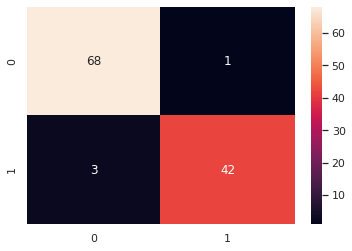

In [0]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)